In [53]:
import pandas as pd
import numpy as np
import os
import re
import math

from concurrent.futures import ThreadPoolExecutor

from utilities.visualizers import view_label_freq
from utilities.loaders import load_labels

In [54]:
DIR = "./data/"
folders = list(filter(lambda file: not file.endswith(".tgz"), os.listdir(DIR)))[:5]

In [55]:
folders

['1028-20100710-hne',
 '1337ad-20170321-ajg',
 '1337ad-20170321-tkg',
 '1337ad-20170321-ynk',
 '1snoke-20120412-hge']

In [56]:
labels = load_labels(folders, DIR)
labels

[('1028-20100710-hne', 'male'),
 ('1337ad-20170321-ajg', 'female'),
 ('1337ad-20170321-tkg', 'female'),
 ('1337ad-20170321-ynk', 'female'),
 ('1snoke-20120412-hge', 'male')]

In [57]:
len(labels)

5

In [58]:
labels_df = pd.DataFrame(labels, columns=["subject_name", "label"])
labels_df

,subject_name,label
0,1028-20100710-hne,male
1,1337ad-20170321-ajg,female
2,1337ad-20170321-tkg,female
3,1337ad-20170321-ynk,female
4,1snoke-20120412-hge,male


# Once all .tar file contents are extracted we proceed to trimming any insignificant parts of the audio signal and have it be of the same length as the labels

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

from scipy.stats import kurtosis as kurt, skew, mode, entropy
from sklearn.model_selection import train_test_split

from utilities.loaders import load_audio
from utilities.preprocessors import encode_features

In [60]:
signals = load_audio(DIR, folders)

shape of final signal: (575808,)
shape of final signal: (568320,)
shape of final signal: (558592,)
shape of final signal: (521216,)
shape of final signal: (608256,)


### Shape of newly combined dataset for each subject will have a longer vector

In [61]:
signals[0]

('1028-20100710-hne',
 array([-0.01312256, -0.01303101, -0.01281738, ...,  0.00253296,
         0.00219727,  0.00201416], dtype=float32))

In [62]:
signals[0][1].shape

(521216,)

In [63]:
len(signals)

5

In [64]:
signals

[('1028-20100710-hne',
  array([-0.01312256, -0.01303101, -0.01281738, ...,  0.00253296,
          0.00219727,  0.00201416], dtype=float32)),
 ('1337ad-20170321-ajg',
  array([-0.01837158, -0.01971436, -0.02127075, ..., -0.00628662,
         -0.00567627, -0.00463867], dtype=float32)),
 ('1337ad-20170321-tkg',
  array([-0.00048828, -0.00061035, -0.00045776, ...,  0.00796509,
          0.00830078,  0.00897217], dtype=float32)),
 ('1337ad-20170321-ynk',
  array([ 0.00189209,  0.00259399,  0.00201416, ..., -0.00323486,
         -0.00314331, -0.00320435], dtype=float32)),
 ('1snoke-20120412-hge',
  array([ 0.00161743, -0.00213623, -0.00314331, ..., -0.00460815,
         -0.00317383, -0.00210571], dtype=float32))]

In [65]:
signals_df = pd.DataFrame(signals, columns=["subject_name", "raw_signals"])
signals_df

,subject_name,raw_signals
0,1028-20100710-hne,"[-0.013122559, -0.013031006, -0.012817383, -0...."
1,1337ad-20170321-ajg,"[-0.018371582, -0.019714355, -0.021270752, -0...."
2,1337ad-20170321-tkg,"[-0.00048828125, -0.00061035156, -0.0004577636..."
3,1337ad-20170321-ynk,"[0.0018920898, 0.0025939941, 0.0020141602, -0...."
4,1snoke-20120412-hge,"[0.0016174316, -0.0021362305, -0.0031433105, 0..."


In [66]:
dataset_df = signals_df.merge(labels_df, how="left", on=["subject_name"])
dataset_df

,subject_name,raw_signals,label
0,1028-20100710-hne,"[-0.013122559, -0.013031006, -0.012817383, -0....",male
1,1337ad-20170321-ajg,"[-0.018371582, -0.019714355, -0.021270752, -0....",female
2,1337ad-20170321-tkg,"[-0.00048828125, -0.00061035156, -0.0004577636...",female
3,1337ad-20170321-ynk,"[0.0018920898, 0.0025939941, 0.0020141602, -0....",female
4,1snoke-20120412-hge,"[0.0016174316, -0.0021362305, -0.0031433105, 0...",male


c:\Users\LARRY\Documents\Scripts\datung-machine-problem\utilities\visualizers.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis = sb.barplot(x=label_freq.values, y=labels, palette="flare") \


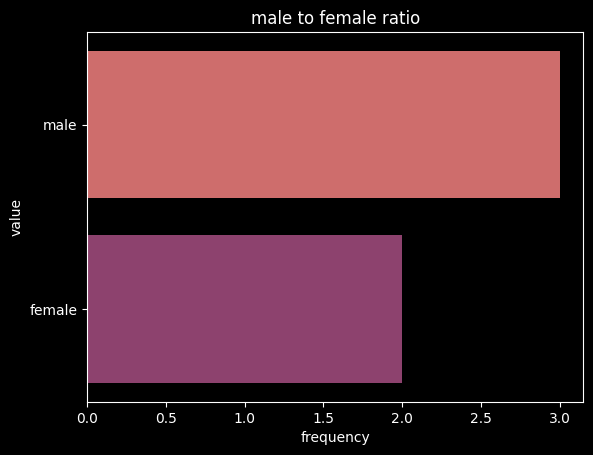

In [67]:
view_label_freq(dataset_df["label"].value_counts(), img_title="male to female ratio", save_img=True, labels=["male", "female"])

In [ ]:
dataset_df["label"], dataset_df_le = encode_features(dataset_df["label"])

In [68]:
train_dataset_df, test_dataset_df = train_test_split(dataset_df, test_size=0.2, random_state=0)

In [69]:
train_dataset_df

,subject_name,raw_signals,label
0,1028-20100710-hne,"[-0.013122559, -0.013031006, -0.012817383, -0....",male
1,1337ad-20170321-ajg,"[-0.018371582, -0.019714355, -0.021270752, -0....",female
3,1337ad-20170321-ynk,"[0.0018920898, 0.0025939941, 0.0020141602, -0....",female
4,1snoke-20120412-hge,"[0.0016174316, -0.0021362305, -0.0031433105, 0...",male


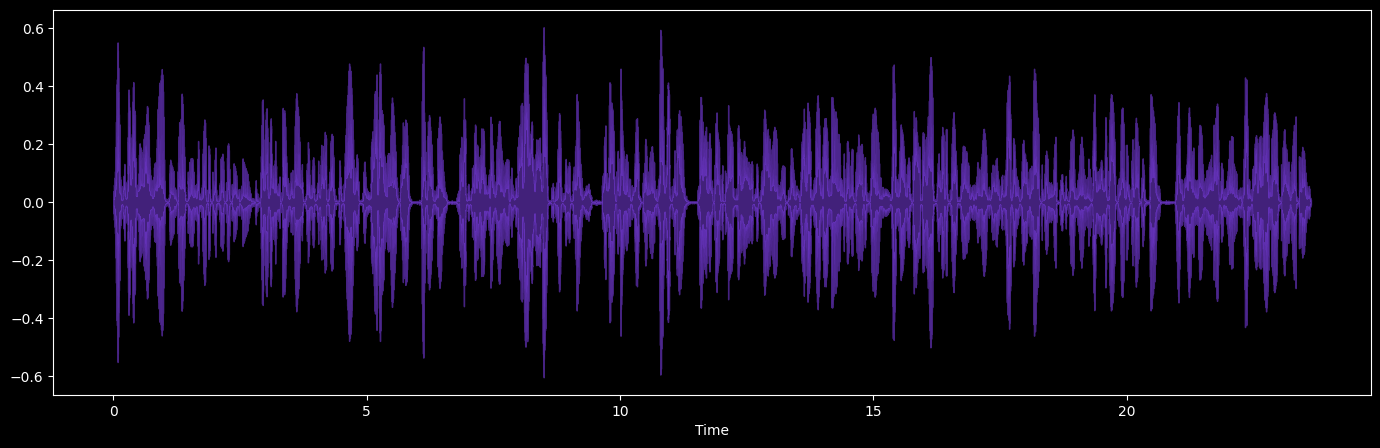

In [70]:
fig = plt.figure(figsize=(17, 5))
librosa.display.waveshow(dataset_df.loc[0, "raw_signals"], alpha=0.5, color="#8442f5")
plt.show()

In [71]:
train_dataset = list(train_dataset_df.itertuples(index=False, name=None))
train_dataset

[('1028-20100710-hne',
  array([-0.01312256, -0.01303101, -0.01281738, ...,  0.00253296,
          0.00219727,  0.00201416], dtype=float32),
  'male'),
 ('1337ad-20170321-ajg',
  array([-0.01837158, -0.01971436, -0.02127075, ..., -0.00628662,
         -0.00567627, -0.00463867], dtype=float32),
  'female'),
 ('1337ad-20170321-ynk',
  array([ 0.00189209,  0.00259399,  0.00201416, ..., -0.00323486,
         -0.00314331, -0.00320435], dtype=float32),
  'female'),
 ('1snoke-20120412-hge',
  array([ 0.00161743, -0.00213623, -0.00314331, ..., -0.00460815,
         -0.00317383, -0.00210571], dtype=float32),
  'male')]

In [72]:
test_dataset = list(test_dataset_df.itertuples(index=False, name=None))
test_dataset

[('1337ad-20170321-tkg',
  array([-0.00048828, -0.00061035, -0.00045776, ...,  0.00796509,
          0.00830078,  0.00897217], dtype=float32),
  'female')]

### All we havee to do now is to extract the features of each combined vector for each subject
### 521216 is the length of the 16000hz test audio signal 

In [73]:
from utilities.feature_extractors import extract_features

In [74]:
# there are 16000 samples per second
hertz = 16000

# how many seconds we want our window to be
# e.g. if we want our signal segment to be 1 second
# then this would mean 16000 samples that we need to aggregate
window_time = 3

# how many seconds we want our signal segments to overlap
hop_time = 1

In [75]:
train_dataset_final = extract_features(train_dataset)
train_dataset_final

1028-20100710-hne
1337ad-20170321-ajg
1337ad-20170321-ynk
1snoke-20120412-hge


[    mean_freq_kHz  median_freq_kHz  std_freq  mode_freq  skewness   kurtosis  \
 0    4.577955e-05        -0.001953  0.061845  -0.000458 -0.137000   7.196029   
 1   -1.414585e-04        -0.001648  0.042312  -0.000458 -0.399168  10.960901   
 2   -6.856601e-05        -0.001617  0.044652  -0.000458  0.162669   8.117035   
 3   -4.303487e-04        -0.001587  0.046739  -0.001160  0.070166   7.156896   
 4   -1.703561e-04        -0.000244  0.057364   0.002502 -0.181697   7.335368   
 5    5.029933e-05        -0.000275  0.067717   0.002197 -0.081122   5.802585   
 6    3.073126e-04         0.000183  0.068909   0.000580 -0.174526   6.068448   
 7    1.155866e-04        -0.000397  0.065451  -0.000366  0.006425   5.683102   
 8    2.104689e-04        -0.000336  0.051719  -0.000366 -0.119901   6.328521   
 9    1.165562e-04        -0.000580  0.074307  -0.001709 -0.039705   6.920554   
 10  -1.285426e-05        -0.001190  0.073363   0.000488 -0.075889   7.422224   
 11  -9.459750e-05        -0

In [76]:
train_dataset_final[0].shape

(31, 12)

In [77]:
train_dataset_final[0]

,mean_freq_kHz,median_freq_kHz,std_freq,mode_freq,skewness,kurtosis,peak_frequency,first_quartile_kHz,third_quartile_kHz,inter_quartile_range_kHz,label,subject_name
0,4.577955e-05,-0.001953,0.061845,-0.000458,-0.137000,7.196029,101.5625,"(-2.1728516e-05,)","(1.8867493e-05,)","(4.059601e-05,)",male,1028-20100710-hne
1,-1.414585e-04,-0.001648,0.042312,-0.000458,-0.399168,10.960901,93.7500,"(-1.4434814e-05,)","(1.0375977e-05,)","(2.4810792e-05,)",male,1028-20100710-hne
2,-6.856601e-05,-0.001617,0.044652,-0.000458,0.162669,8.117035,117.1875,"(-1.5655518e-05,)","(1.2023926e-05,)","(2.7679444e-05,)",male,1028-20100710-hne
3,-4.303487e-04,-0.001587,0.046739,-0.001160,0.070166,7.156896,109.3750,"(-1.6571044e-05,)","(1.2939453e-05,)","(2.9510498e-05,)",male,1028-20100710-hne
4,-1.703561e-04,-0.000244,0.057364,0.002502,-0.181697,7.335368,101.5625,"(-1.9805908e-05,)","(1.702881e-05,)","(3.6834717e-05,)",male,1028-20100710-hne
5,5.029933e-05,-0.000275,0.067717,0.002197,-0.081122,5.802585,382.8125,"(-2.2583008e-05,)","(2.0690917e-05,)","(4.3273925e-05,)",male,1028-20100710-hne
6,3.073126e-04,0.000183,0.068909,0.000580,-0.174526,6.068448,382.8125,"(-1.9317627e-05,)","(1.763916e-05,)","(3.6956786e-05,)",male,1028-20100710-hne
7,1.155866e-04,-0.000397,0.065451,-0.000366,0.006425,5.683102,109.3750,"(-1.7730712e-05,)","(1.4801026e-05,)","(3.2531738e-05,)",male,1028-20100710-hne
8,2.104689e-04,-0.000336,0.051719,-0.000366,-0.119901,6.328521,109.3750,"(-1.4953614e-05,)","(1.3397217e-05,)","(2.835083e-05,)",male,1028-20100710-hne
9,1.165562e-04,-0.000580,0.074307,-0.001709,-0.039705,6.920554,343.7500,"(-2.2644042e-05,)","(2.2033691e-05,)","(4.4677734e-05,)",male,1028-20100710-hne


In [78]:
train_dataset_final[1]

,mean_freq_kHz,median_freq_kHz,std_freq,mode_freq,skewness,kurtosis,peak_frequency,first_quartile_kHz,third_quartile_kHz,inter_quartile_range_kHz,label,subject_name
0,0.000008,0.001190,0.032391,0.000549,1.539193,27.683519,15.6250,"(-8.331299e-06,)","(1.0223389e-05,)","(1.8554687e-05,)",female,1337ad-20170321-ajg
1,-0.000070,0.001434,0.023003,0.001831,-0.060266,13.251698,7.8125,"(-7.232666e-06,)","(8.209228e-06,)","(1.5441894e-05,)",female,1337ad-20170321-ajg
2,-0.000003,0.001343,0.021991,0.001740,0.029164,14.438578,7.8125,"(-6.5612794e-06,)","(8.392334e-06,)","(1.4953614e-05,)",female,1337ad-20170321-ajg
3,-0.000043,0.000854,0.017400,0.001190,-0.251299,7.163522,15.6250,"(-5.432129e-06,)","(7.232666e-06,)","(1.2664795e-05,)",female,1337ad-20170321-ajg
4,0.000066,0.001007,0.016759,0.001190,-0.319414,8.439436,7.8125,"(-4.8522948e-06,)","(6.92749e-06,)","(1.1779785e-05,)",female,1337ad-20170321-ajg
5,0.000058,0.000885,0.015993,0.001190,-0.325910,10.844878,7.8125,"(-4.79126e-06,)","(6.2561035e-06,)","(1.1047363e-05,)",female,1337ad-20170321-ajg
6,-0.000044,0.000946,0.021317,0.001190,1.789827,32.247517,7.8125,"(-6.072998e-06,)","(7.171631e-06,)","(1.32446285e-05,)",female,1337ad-20170321-ajg
7,0.000041,0.001099,0.023268,-0.000214,1.124708,23.350380,7.8125,"(-6.6833495e-06,)","(9.101867e-06,)","(1.5785217e-05,)",female,1337ad-20170321-ajg
8,-0.000083,0.001678,0.025410,-0.000580,0.784240,16.714035,15.6250,"(-8.270264e-06,)","(1.09558105e-05,)","(1.9226074e-05,)",female,1337ad-20170321-ajg
9,0.000138,0.002533,0.022332,0.002472,-0.604442,3.575634,7.8125,"(-7.5378416e-06,)","(1.1474609e-05,)","(1.9012452e-05,)",female,1337ad-20170321-ajg


In [79]:
train_dataset_merged = pd.concat(train_dataset_final, axis=0, ignore_index=True)
train_dataset_merged

,mean_freq_kHz,median_freq_kHz,std_freq,mode_freq,skewness,kurtosis,peak_frequency,first_quartile_kHz,third_quartile_kHz,inter_quartile_range_kHz,label,subject_name
0,0.000046,-0.001953,0.061845,-0.000458,-0.137000,7.196029,101.5625,"(-2.1728516e-05,)","(1.8867493e-05,)","(4.059601e-05,)",male,1028-20100710-hne
1,-0.000141,-0.001648,0.042312,-0.000458,-0.399168,10.960901,93.7500,"(-1.4434814e-05,)","(1.0375977e-05,)","(2.4810792e-05,)",male,1028-20100710-hne
2,-0.000069,-0.001617,0.044652,-0.000458,0.162669,8.117035,117.1875,"(-1.5655518e-05,)","(1.2023926e-05,)","(2.7679444e-05,)",male,1028-20100710-hne
3,-0.000430,-0.001587,0.046739,-0.001160,0.070166,7.156896,109.3750,"(-1.6571044e-05,)","(1.2939453e-05,)","(2.9510498e-05,)",male,1028-20100710-hne
4,-0.000170,-0.000244,0.057364,0.002502,-0.181697,7.335368,101.5625,"(-1.9805908e-05,)","(1.702881e-05,)","(3.6834717e-05,)",male,1028-20100710-hne
...,...,...,...,...,...,...,...,...,...,...,...,...
131,-0.000007,0.000519,0.037271,0.000305,-0.730471,16.684341,570.3125,"(-8.850097e-06,)","(1.1474609e-05,)","(2.0324707e-05,)",male,1snoke-20120412-hge
132,-0.000022,0.000885,0.037132,0.001343,-0.787142,16.864979,570.3125,"(-1.0192871e-05,)","(1.2664795e-05,)","(2.2857666e-05,)",male,1snoke-20120412-hge
133,-0.000042,0.001099,0.039446,0.002899,-1.030452,13.541649,554.6875,"(-1.0925293e-05,)","(1.3671875e-05,)","(2.4597168e-05,)",male,1snoke-20120412-hge
134,-0.000015,0.001068,0.041582,0.001495,-0.732530,11.539433,585.9375,"(-1.1566162e-05,)","(1.3580322e-05,)","(2.5146484e-05,)",male,1snoke-20120412-hge
